**clustering** is the task of partitioning the dataset into groups,
called **clusters**. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. 

Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

**k-means clustering** is one of the simplest and most commonly used clustering algorithms. It tries to **find cluster centers that are representative** of certain regions of the data. 

The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.

In [6]:
import mglearn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

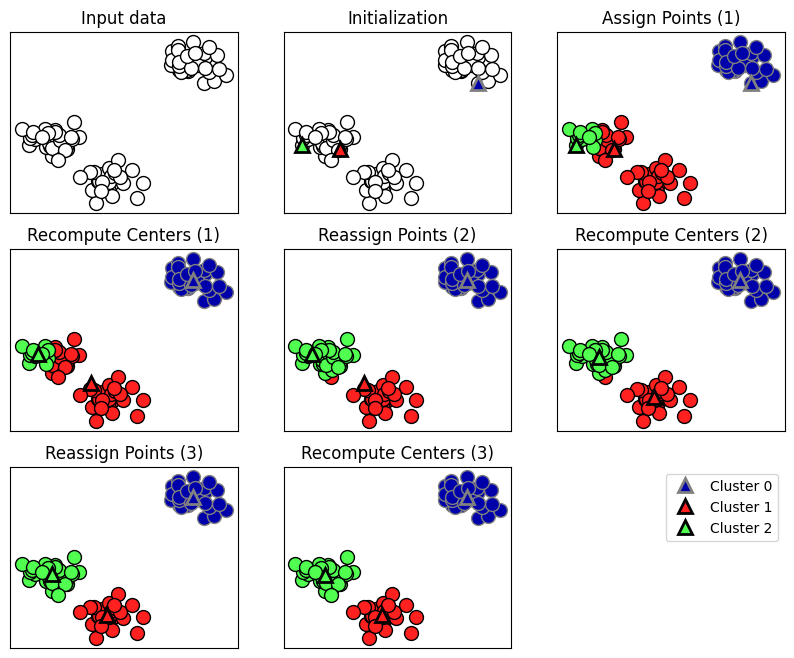

In [2]:
mglearn.plots.plot_kmeans_algorithm()

We specified that we are looking for three clusters, so the algorithm was initialized by **declaring three data points randomly as cluster centers** (see “**Initialization**”). 

Then the iterative algorithm starts. First, **each data point is assigned to the cluster center it is closest** to (see “**Assign Points (1)**”). 

Next, the **cluster centers are updated** to be the mean of the assigned points (see “**Recompute Centers(1)**”). 

Then the process is repeated two more times. After the third iteration, the
assignment of points to cluster centers remained unchanged, so the algorithm stops.

Given new data points, k-means will assign each to the closest cluster center.

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

During the algorithm, each training data point in X is assigned a cluster label. You can
find these labels in the kmeans.labels_ attribute:

In [10]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


You can also assign cluster labels to new points, using the **predict method**. Each new point is assigned to the closest cluster center when predicting, but the existing model
is not changed. Running predict on the training set returns the same result as
**labels_**:

In [11]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


You can see that clustering is somewhat **similar to classification**, in that each item gets a label. However, there is no ground truth, and consequently the labels themselves have **no a priori meaning**. 

For the clustering we just computed on the two-dimensional toy dataset, that means
that we should not assign any significance to the fact that one group was labeled 0
and another one was labeled 1. Running the algorithm again might result in a differ‐
ent numbering of clusters because of the random nature of the initialization.

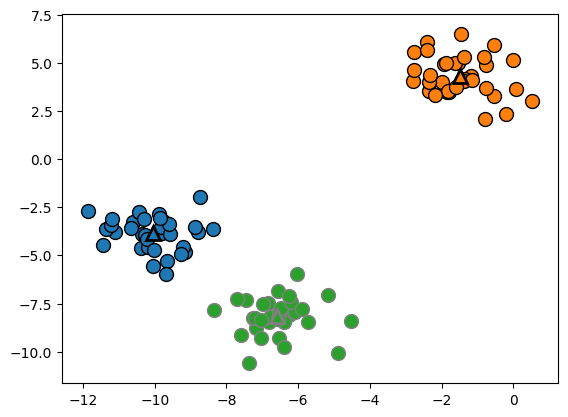

In [21]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
 kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
 markers='^', markeredgewidth=2)
plt.show()

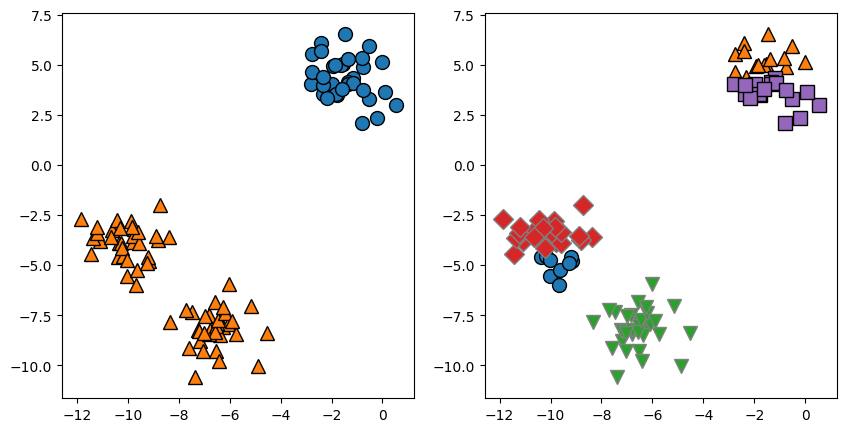

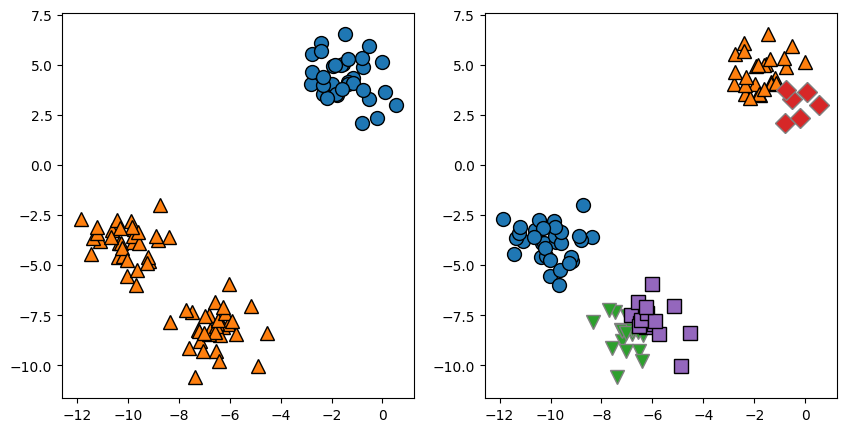

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

Even if you know the “right” number of clusters for a given dataset, k-means might **not always be able to recover them**. Each cluster is defined solely by its center, which means that each cluster is a **convex shape**. 

As a result of this,**k-means can only capture relatively simple shapes** k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. T

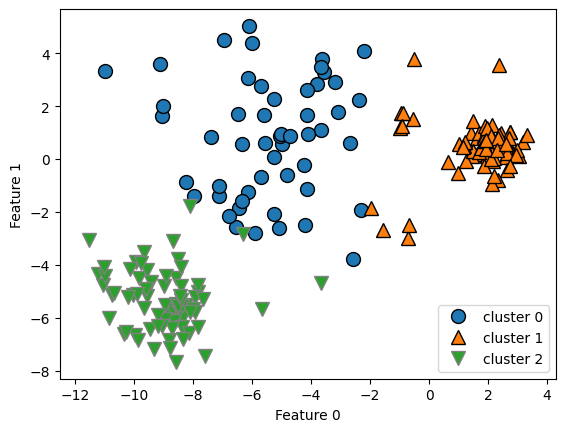

In [26]:
X_varied, y_varied = make_blobs(n_samples=200,
 cluster_std=[1.0, 2.5, 0.5],
 random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means also assumes that all directions are equally important for each cluster.

However, these groups are stretched toward the
diagonal. As k-means only considers the distance to the nearest cluster center, it can’t
handle this kind of data:



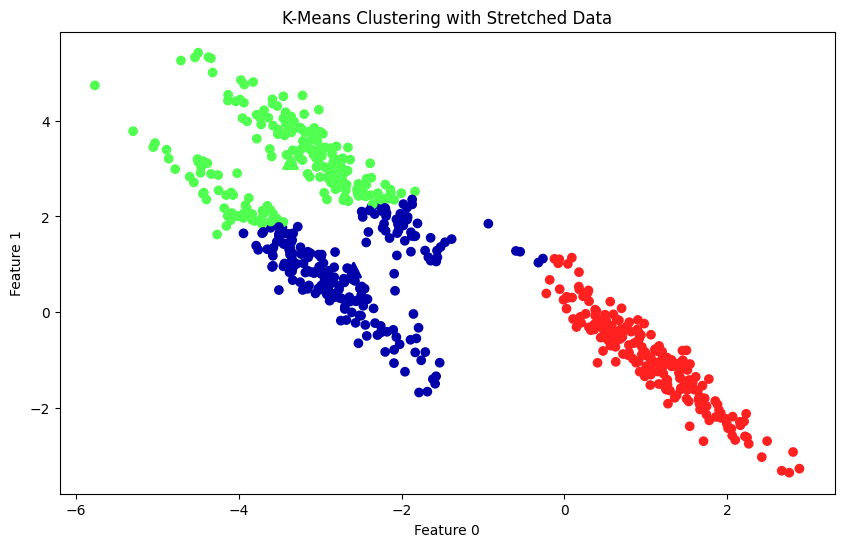

In [35]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# Transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("K-Means Clustering with Stretched Data")
plt.show()


k-means also performs poorly if the clusters have more complex shapes, like the
two_moons data we encountered

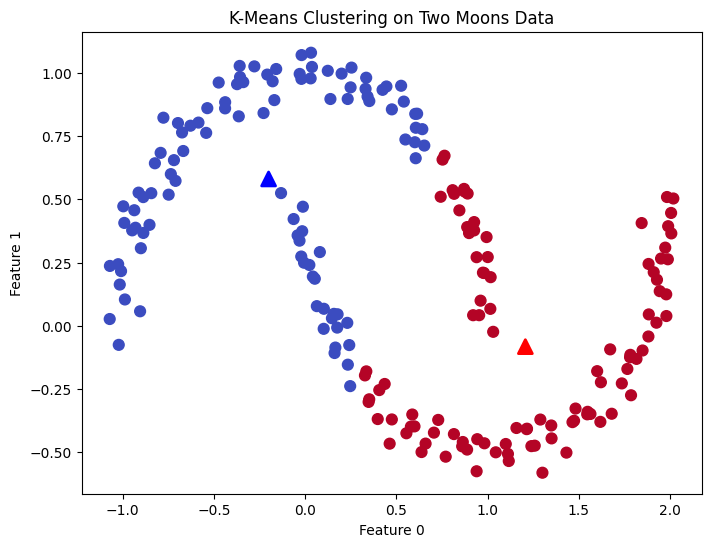

In [37]:

# Générer des données synthétiques en forme de deux lunes avec moins de bruit
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Regrouper les données en deux clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Tracer les clusters et les centres des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=['blue', 'red'], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("K-Means Clustering on Two Moons Data")
plt.show()

Even though k-means is a clustering algorithm, there are interesting parallels between k-means and the decomposition methods like PCA and NMF. 

PCA tries to find directions of maximum variance in
the data, while NMF tries to find additive components, which often correspond to “extremes” or “parts” of the data

Both methods tried to express the data points as a sum over some components. k-means, on the other hand, tries to represent each data point using a **cluster center.** You can think of that as each point being represented using **only a single component**, which is given by the cluster center. This view of k-means as a **decomposition method**, where each point is represented using a single component, is called **vector quantization**.

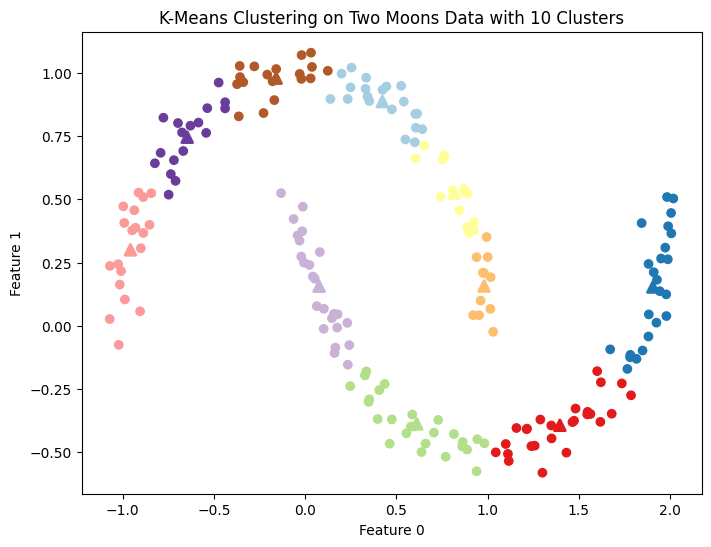

Cluster memberships:
[8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


In [44]:
from sklearn.datasets import make_moons

# Générer des données synthétiques en forme de deux lunes avec moins de bruit
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Appliquer KMeans avec 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("K-Means Clustering on Two Moons Data with 10 Clusters")
plt.show()

# Afficher l'appartenance aux clusters
print("Cluster memberships:\n{}".format(y_pred))

Using this 10-dimensional repre‐
sentation, it would now be possible to separate the two half-moon shapes using a lin‐
ear model, which would not have been possible using the original two features. It is
also possible to get an even more expressive representation of the data by using the
distances to each of the cluster centers as features. This can be accomplished using
the transform method of kmeans

In [45]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))


Distance feature shape: (200, 10)
Distance features:
[[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]


k-means is a very popular algorithm for clustering, not only because it is relatively
easy to understand and implement, but also because it runs relatively **quickly**.

One of the drawbacks of k-means is that it relies on a **random initialization**, which
means the outcome of the algorithm depends on a random seed.

Further downsides of k-means are the relatively restrictive
assumptions made on the shape of clusters, and the requirement to specify the num‐
ber of clusters you are looking for